In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train , y_train),(X_test , y_test) = mnist.load_data()

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


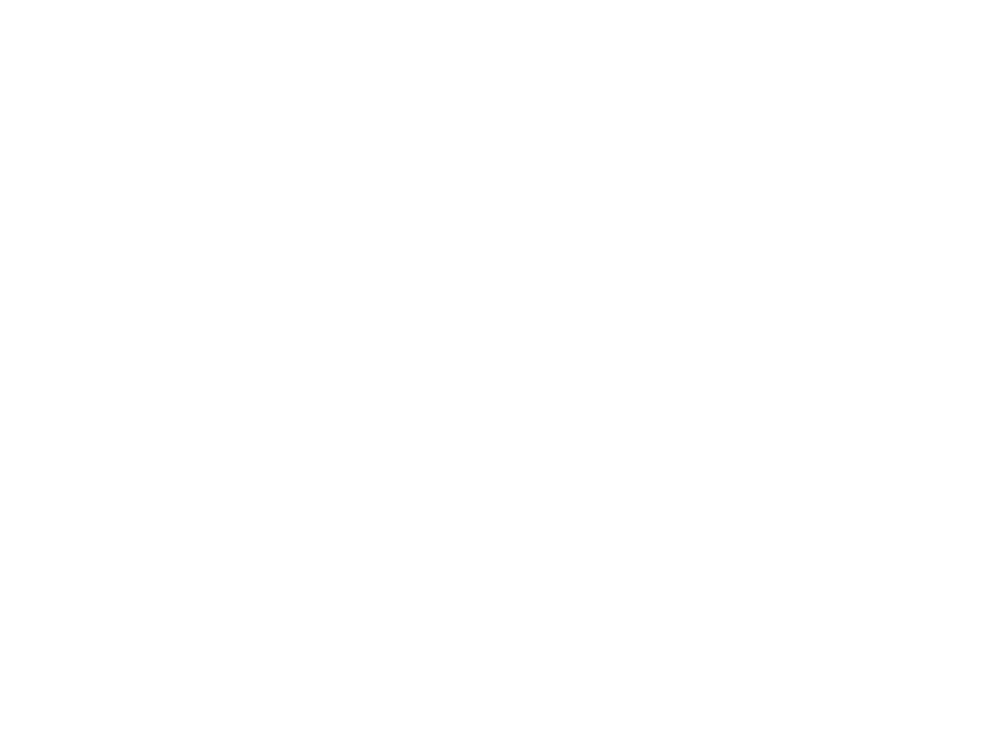

In [5]:
plt.imshow(X_train[0])

In [6]:
# normalize the image
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train/255
X_test = X_test/255

### Architecture of Auto encoder

In [19]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [29]:
encoder = Sequential()
encoder.add(Flatten( input_shape=[28,28]))
encoder.add(Dense(400 , activation ='relu'))
encoder.add(Dense(200 , activation = 'relu'))
encoder.add(Dense(100 , activation = 'relu'))
encoder.add(Dense(50 , activation = 'relu'))
encoder.add(Dense(25 , activation = 'relu'))

In [30]:
decoder = Sequential()
decoder.add(Dense(50 , activation ='relu' , input_shape =[25]))
decoder.add(Dense(100 ,activation ='relu'))
decoder.add(Dense(200 ,activation ='relu'))
decoder.add(Dense(400 ,activation ='relu'))
decoder.add(Dense(784 , activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [24]:
from tensorflow.keras.optimizers import SGD

In [31]:
autoencoder = Sequential([encoder , decoder])
autoencoder.compile(optimizer= SGD(1.5) , loss ='binary_crossentropy' , metrics =['accuracy'])

In [32]:
autoencoder.fit(X_train , X_train , epochs = 5 , validation_data = [X_test , X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 29s 477us/sample - loss: 0.2505 - accuracy: 0.7914 - val_loss: 0.2001 - val_accuracy: 0.7957
Epoch 2/5
60000/60000 [==============================] - 28s 465us/sample - loss: 0.1800 - accuracy: 0.7983 - val_loss: 0.1579 - val_accuracy: 0.8009
Epoch 3/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.1547 - accuracy: 0.8030 - val_loss: 0.1471 - val_accuracy: 0.8013
Epoch 4/5
60000/60000 [==============================] - 24s 399us/sample - loss: 0.1449 - accuracy: 0.8048 - val_loss: 0.1406 - val_accuracy: 0.8058
Epoch 5/5
60000/60000 [==============================] - 25s 411us/sample - loss: 0.1398 - accuracy: 0.8058 - val_loss: 0.1366 - val_accuracy: 0.8048


In [33]:
pred_images = autoencoder.predict(X_test)

ORIGINAL IMAGE of Number :


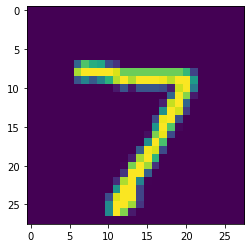

In [48]:
n = 1
print('ORIGINAL IMAGE of Number :')
plt.imshow(X_test[0])

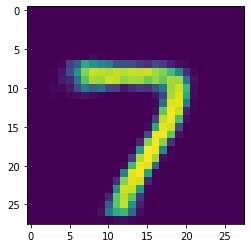

In [47]:
plt.imshow(pred_images[0])

In [49]:
def plot(n):
    print('Original Image')
    plt.imshow(X_test[n])
    plt.show()
    print('Decoded Image')
    plt.imshow(pred_images[n])
    plt.show()

Original Image


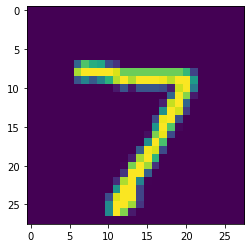

Encoded Image


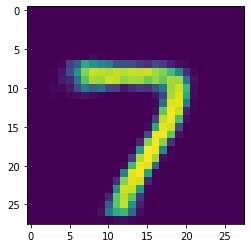

In [50]:
plot(0)

### Denoising Images With Autoencoder

In [51]:
from tensorflow.keras.layers import GaussianNoise

In [52]:
sample = GaussianNoise(0.3)

In [53]:
noisy = sample(X_test[0:2] , training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



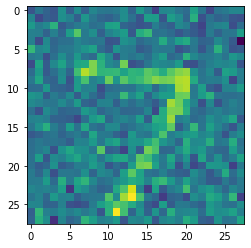

In [54]:
plt.imshow(noisy[0])

In [55]:
np.random.seed(101) # for same distribution

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#ADD NOISE
encoder.add(GaussianNoise(0.3))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [56]:
decoder = Sequential()
decoder.add(Dense(50 , activation ='relu' , input_shape =[25]))
decoder.add(Dense(100 ,activation ='relu'))
decoder.add(Dense(200 ,activation ='relu'))
decoder.add(Dense(400 ,activation ='relu'))
decoder.add(Dense(784 , activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [57]:
noise_remover = Sequential([encoder , decoder])
noise_remover.compile(optimizer =SGD(1.5) , loss ='binary_crossentropy' , metrics =['accuracy'])

In [58]:
noise_remover.fit(X_train , X_train , epochs=10 , validation_data =[X_test , X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 401us/sample - loss: 0.2455 - accuracy: 0.7921 - val_loss: 0.2164 - val_accuracy: 0.7921
Epoch 2/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.1871 - accuracy: 0.7977 - val_loss: 0.1652 - val_accuracy: 0.8026
Epoch 3/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.1611 - accuracy: 0.8021 - val_loss: 0.1511 - val_accuracy: 0.8015
Epoch 4/10
60000/60000 [==============================] - 26s 433us/sample - loss: 0.1510 - accuracy: 0.8041 - val_loss: 0.1438 - val_accuracy: 0.8023
Epoch 5/10
60000/60000 [==============================] - 25s 417us/sample - loss: 0.1442 - accuracy: 0.8056 - val_loss: 0.1390 - val_accuracy: 0.8023
Epoch 6/10
60000/60000 [==============================] - 27s 449us/sample - loss: 0.1391 - accuracy: 0.8065 - val_loss: 0.1343 - val_accuracy: 0.8038
Epoch 7/10
60000/60000 [====================

In [63]:
noisy_images = sample(X_test , training = True)

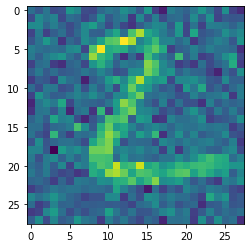

In [64]:
plt.imshow(noisy_images[1])

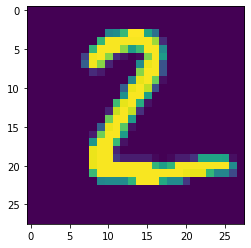

In [62]:
plt.imshow(X_test[1])

In [65]:
pred_images = noise_remover.predict(noisy_images)

Original Image :


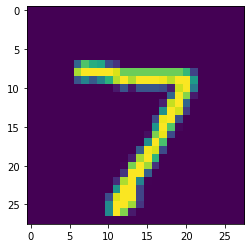

Noisy Image :


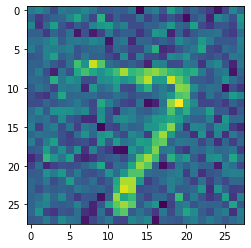

Encoded Image :


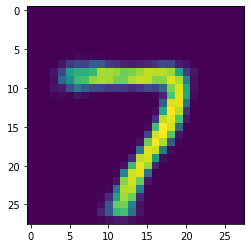

In [66]:
n = 0
print('Original Image :')
plt.imshow(X_test[n])
plt.show()
print('Noisy Image :')
plt.imshow(noisy_images[n])
plt.show()
print('Encoded Image :')
plt.imshow(pred_images[n])
plt.show()

<b>Conculsion:</b> <i>Auto encoder is best for noise remover and Dimensionlity Reduction </i>